A simple example of pricing a call option in a Black Scholes world comparing both analytical and Monte Carlo techniques

In [27]:

#required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

#stock info
risk_free_rate = 0.05
S0 = 10
sigma = 0.15

#option info
K = 11
T = 1
t = 0

In [28]:
#Before doing a Monte Carlo Estimate I will get the analytical solution for later comparison

d1 = (math.log(S0/K)+(risk_free_rate + sigma**2/2)*(T-t))/(sigma*math.sqrt(T-t))
d2 = d1 - sigma*math.sqrt(T-t)

analytic_call = S0*norm.cdf(d1)-K*math.exp(-risk_free_rate*(T-t))*norm.cdf(d2)

print("Cost of a Black Scholes vanilla call option = ",analytic_call)

Cost of a Black Scholes vanilla call option =  0.4075865972892556


In [29]:
#functions for valuations with our simulated stock prices at time T and our call payoffs at time T

def terminal_shareprices(S0,risk_free_rate,sigma,Z,T):
    return S0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

def discounted_call_payoff(S_T,K,risk_free_rate,T):
    return np.exp(-risk_free_rate*T)*np.maximum(S_T-K,0)

In [39]:
#generate monte carlo estimates

np.random.seed(0)

mc_call = [None]*50
mc_std = [None]*50

for i in range(1,51):
    norm_array = norm.rvs(size = 1000*i)
    term_val = terminal_shareprices(S0,risk_free_rate,sigma,norm_array,T-t)
    mc_val = discounted_call_payoff(term_val,strike,risk_free_rate,T-t)
    mc_call[i-1] = np.mean(mc_val)
    mc_std[i-1] = np.std(mc_val)/np.sqrt(i*1000)
    
print("Monte Carlo estimated call price = ",(np.mean(mc_call)))


Monte Carlo estimated call price =  0.40621957920614327


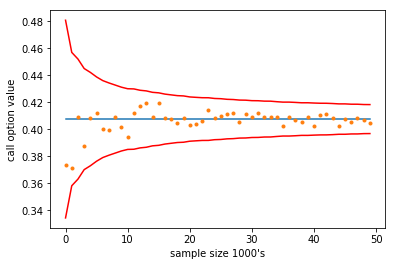

In [35]:
plt.plot([analytic_call]*50)
plt.plot(mc_call,'.')
plt.plot(analytic_call+3*np.array(mc_std),'r')
plt.plot(analytic_call-3*np.array(mc_std),'r')
plt.xlabel("sample size 1000's")
plt.ylabel("call option value")
plt.show()


It can be seen above that the blue line is our Black Scholes analytic option value whilst the orange dots are the Monte Carlo estimates for increasing sample sizes of 1000-50000. The red lines simply show 3 standard deviations from the analytic price. The Monte Carlo estimates converge quite quickly to the analytic price. The Monte Carlo price is marginally lower than that of the Black Scholes price.

Important: This will not be new or novel to anyone with python and calculus knowledge however the more interesting use of this technique now that we know it outputs a similar result to the analytic solution would be to use it to value more exotic options that do not have analytic solutions. Further depth can be added by altering the stock price paths using proprietary models perhaps including factors and or random jumps, then pricing options based on this. Only then would a profitable trading strategy be able to be attained.